In [6]:
import numpy as np
from cv2 import *
from matplotlib import pyplot as plt

In [7]:
histR = np.zeros(64)
histG = np.zeros(64)
histB = np.zeros(64)
nbins = 64
histrange = range(0,256)
histWidth = int(nbins)
histheight = int(nbins/2)

In [8]:
# create a mask
mask = np.zeros((histheight,histWidth), np.uint8)
mask[0:histheight, 0:histWidth] = 255
histImgR = np.zeros((histheight,histWidth), np.uint8)
histImgG = np.zeros((histheight,histWidth), np.uint8)
histImgB = np.zeros((histheight,histWidth), np.uint8)

In [9]:
cap = VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

# Define the codec and create VideoWriter object
# fourcc = VideoWriter_fourcc(*'XVID')
# out = VideoWriter('output.avi', fourcc, 20.0, (640,  480))

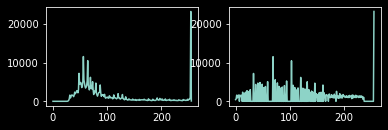

In [10]:
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    cap.set(CAP_PROP_FRAME_WIDTH, 640)
    cap.set(CAP_PROP_FRAME_HEIGHT, 480)

    width = cap.get(CAP_PROP_FRAME_WIDTH)
    height = cap.get(CAP_PROP_FRAME_HEIGHT)

    # print('width: ', width)
    # print('heigth', height)
    

    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break




    # frame = flip(frame, 0)
    # write the flipped frame
    # out.write(frame)
    # Our operations on the frame come here

    # Our operations on the frame come here
    gray = cvtColor(frame, COLOR_BGR2GRAY)
    histgray = calcHist([gray],[0],None,[256],[0,256])
    
    # [b,g,r]
    

    equ = equalizeHist(gray) # histogram equalization
    histequ = calcHist([equ],[0],None,[256],[0,256])

    mask_default = np.zeros((histheight, nbins), np.uint8)
    
    

    
    

    res = np.hstack((gray,equ)) #stacking images side-by-side

    imshow('histogram equalization', res)
    if waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
destroyAllWindows()
plt.subplot(223), plt.plot(histgray)
plt.subplot(224), plt.plot(histequ)
# plt.savefig(histequ.png)
plt.show()